'subgrid_params': {
    'viscosity_scale': 1.0,
    # Physical meaning: Multiplies hyperviscosity coefficient
    # Effect: Higher = more damping of small scales
    # Range: [0.5, 5.0]
    # Typical tuned value: 1.5 - 2.5 for low-res
    # Physics: Must be > 0, unrealistic if > 10
    
    'drag_scale': 1.0,
    # Physical meaning: Multiplies Ekman drag coefficient  
    # Effect: Higher = faster energy dissipation in lower layer
    # Range: [0.5, 3.0]
    # Typical tuned value: 1.2 - 2.0 for low-res
    # Physics: Must be > 0, unrealistic if > 5
    
    'eddy_diffusivity': 0.0,
    # Physical meaning: Additional biharmonic diffusion (m²/s)
    # Effect: Smooths gradients, represents unresolved mixing
    # Range: [0.0, 1e5]
    # Typical tuned value: 1e4 - 5e4 for low-res
    # Physics: Must be ≥ 0, rarely > 1e6
    
    'smagorinsky_coeff': 0.0,
    # Physical meaning: Smagorinsky eddy viscosity coefficient
    # Effect: Dynamic viscosity proportional to strain rate
    # Range: [0.0, 0.3]
    # Typical tuned value: 0.10 - 0.20
    # Physics: Must be ≥ 0, standard value ~0.15, rarely > 0.5
    
    'energy_correction': 0.0,
    # Physical meaning: Energy tendency correction (backscatter)
    # Effect: Negative = adds energy (inverse cascade)
    #         Positive = removes energy
    # Range: [-0.01, 0.01]
    # Typical tuned value: -0.002 to -0.008 (backscatter)
    # Physics: |value| > 0.02 often causes instability
    
    'enstrophy_correction': 0.0,
    # Physical meaning: Additional enstrophy dissipation rate
    # Effect: Removes small-scale vorticity fluctuations
    # Range: [0.0, 1e-6]
    # Typical tuned value: 1e-7 - 5e-7
    # Physics: Must be ≥ 0, > 1e-5 causes over-damping
}


QG TWO-LAYER MODEL: HIGH-RES vs LOW-RES COMPARISON

LOADING EXISTING HIGH-RES RESULTS
✓ High-res results loaded successfully
  Grid: 512 x 256
  Time range: 0 to 180.0 days
  Snapshots: 361

LOADING EXISTING LOW-RES RESULTS
✓ Low-res results loaded successfully
  Grid: 64 x 32
  Time range: 0 to 180.0 days
  Snapshots: 361

⚠️  Subgrid parameters differ!
  Loaded:
    viscosity_scale: 0.5 ←DIFF
    drag_scale: 0.5 ←DIFF
    eddy_diffusivity: 0.005 ←DIFF
    smagorinsky_coeff: 0.015 ←DIFF
    energy_correction: -0.002 ←DIFF
    enstrophy_correction: 3e-09 ←DIFF



  Re-run with current params? (y/n):  y



Running LowRes_64x32 Simulation
Grid: 64 x 32
Resolution: 31.2 km per grid point

Subgrid Parameters:
  viscosity_scale: 2.845714
  drag_scale: 1.756769
  eddy_diffusivity: 2790.588
  smagorinsky_coeff: 0.2157385
  energy_correction: -0.00244926
  enstrophy_correction: 1.862843e-07

Initial Energy: 5.940e+02
Initial Enstrophy: 8.404e-12

Integrating...
  Day   2.0 | Energy: 5.690e+02 | Enstrophy: 7.975e-12
  Day   4.0 | Energy: 5.399e+02 | Enstrophy: 7.590e-12
  Day   6.0 | Energy: 5.155e+02 | Enstrophy: 7.292e-12
  Day   8.0 | Energy: 4.912e+02 | Enstrophy: 6.986e-12
  Day  10.0 | Energy: 4.640e+02 | Enstrophy: 6.644e-12
  Day  12.0 | Energy: 4.354e+02 | Enstrophy: 6.303e-12
  Day  14.0 | Energy: 4.089e+02 | Enstrophy: 5.995e-12
  Day  16.0 | Energy: 3.885e+02 | Enstrophy: 5.780e-12
  Day  18.0 | Energy: 3.702e+02 | Enstrophy: 5.570e-12
  Day  20.0 | Energy: 3.534e+02 | Enstrophy: 5.341e-12
  Day  22.0 | Energy: 3.436e+02 | Enstrophy: 5.162e-12
  Day  24.0 | Energy: 3.270e+02 | Enstr

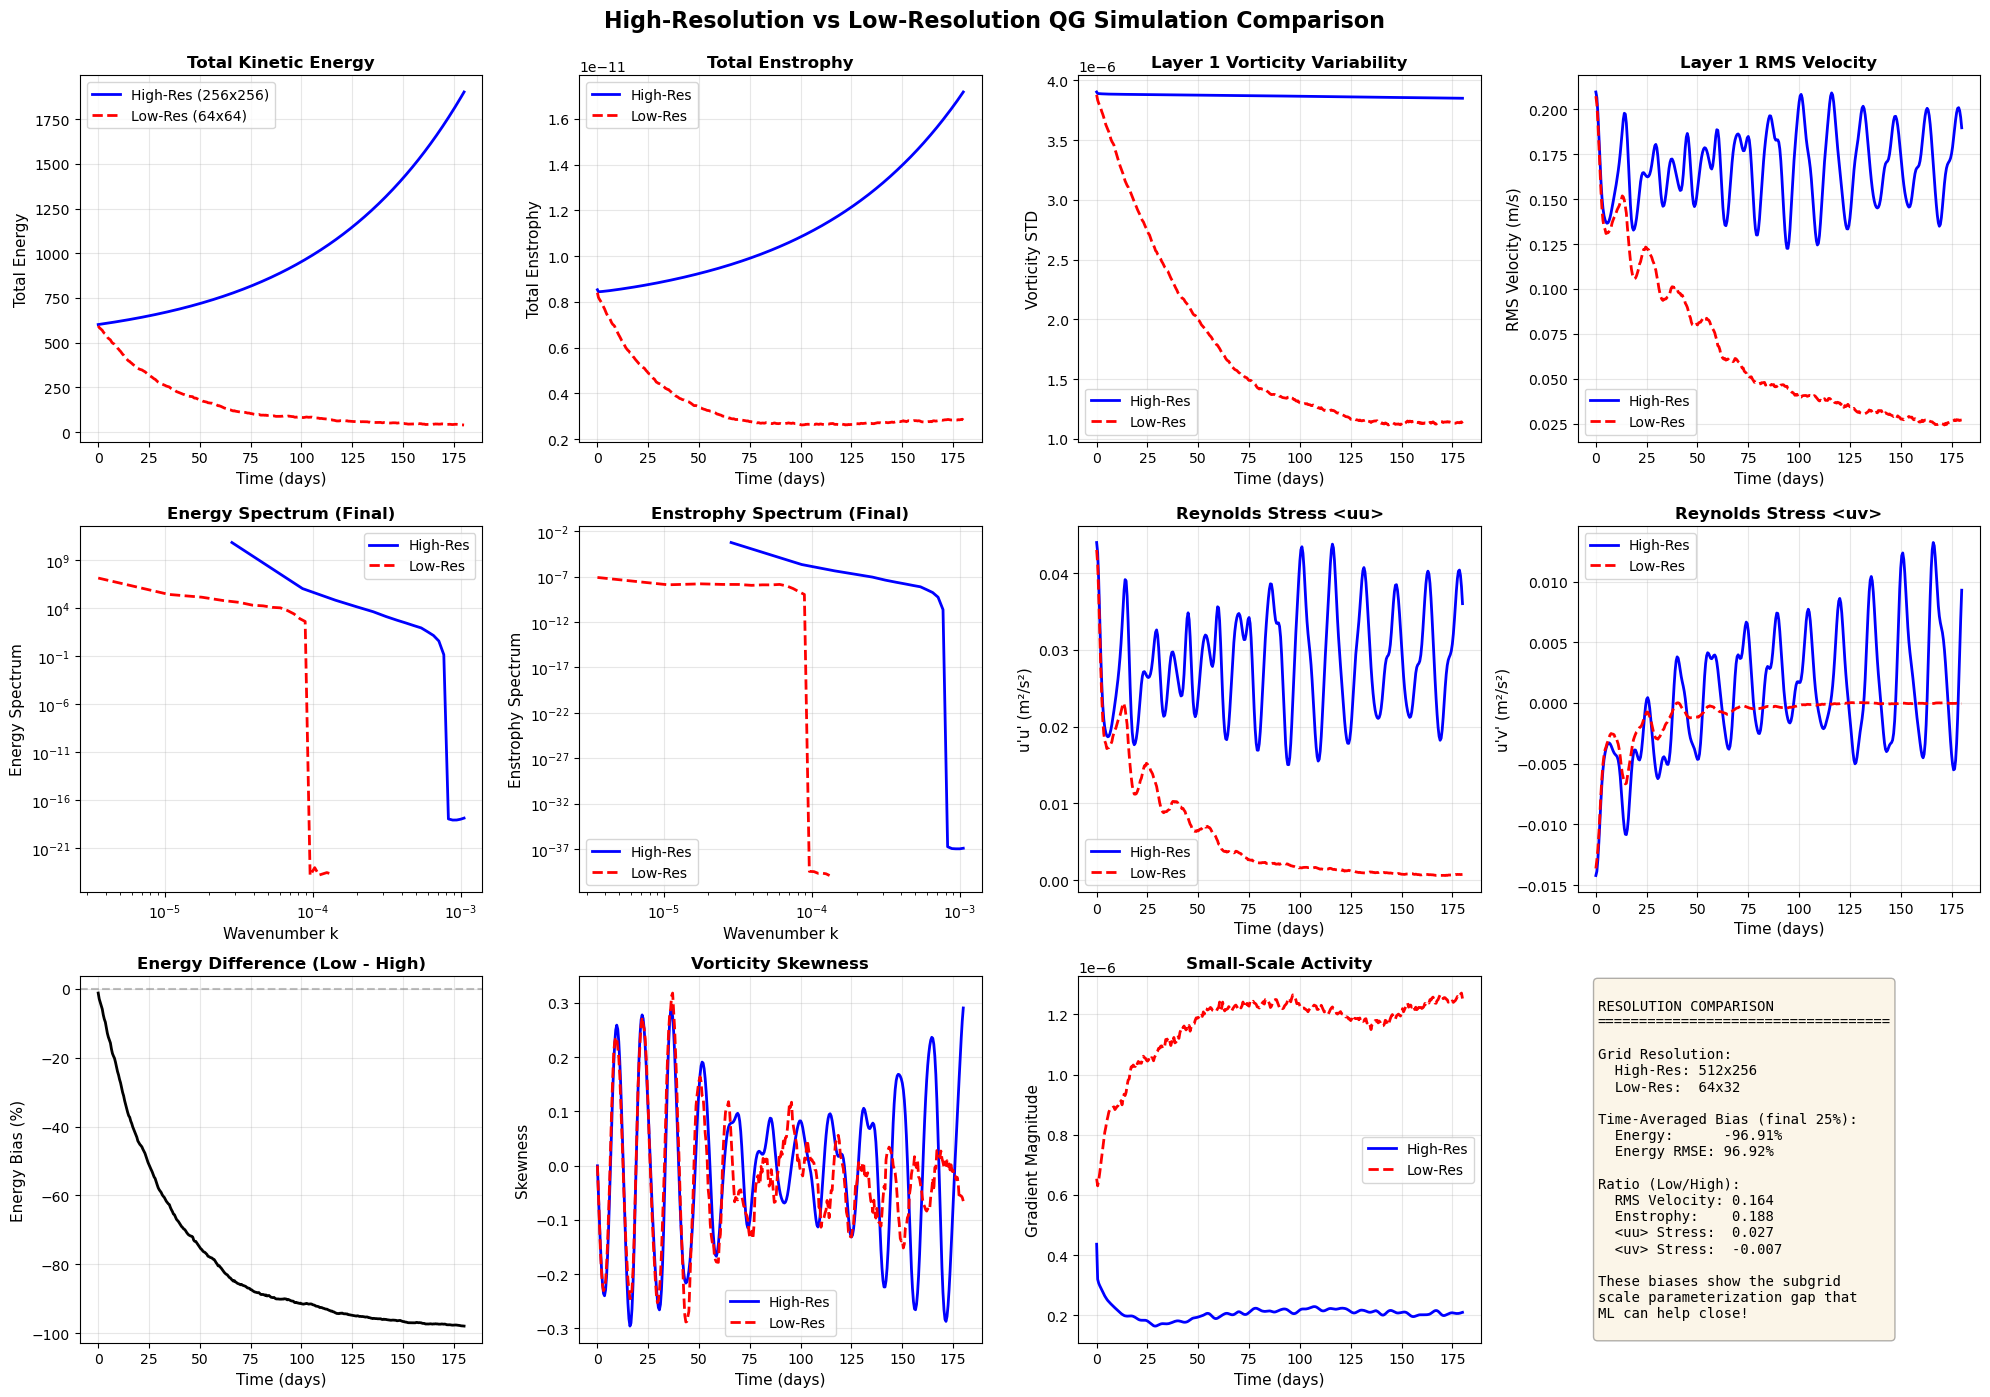


DETAILED COMPARISON SUMMARY

GRID INFORMATION:
  High-Res: 512x256 (dx = 3.9 km)
  Low-Res:  64x32 (dx = 31.2 km)
  Resolution Ratio: 8x coarser

KEY STATISTICS (Time-Averaged, Final 25%):
  Energy Bias:        -96.91%
  Energy RMSE:        96.92%
  Velocity Ratio:     0.164
  Enstrophy Ratio:    0.188
  Reynolds uu Ratio:  0.027

FIELD DIFFERENCES (Final Time, Low-Res vs Coarsened High-Res):
  Vorticity Layer 1 NRMSE:      1.004
  Vorticity Layer 2 NRMSE:      1.060
  Streamfunction Layer 1 NRMSE: 0.944
  Streamfunction Layer 2 NRMSE: 0.943

  Note: NRMSE = Normalized RMS Error (difference / std_deviation)
        Values > 0.3 indicate significant bias needing parameterization


TIME-AVERAGED COMPARISON (Last 30 days)

COMPUTING TIME-AVERAGED FIELDS (Last 30 days)
Averaging over last 30 days (61 snapshots)
Time range: 150.0 to 180.0 days
Averaging over last 30 days (61 snapshots)
Time range: 150.0 to 180.0 days

TIME-AVERAGED FIELD COMPARISON

Vorticity NRMSE:
  Layer 1:    1.4903
  

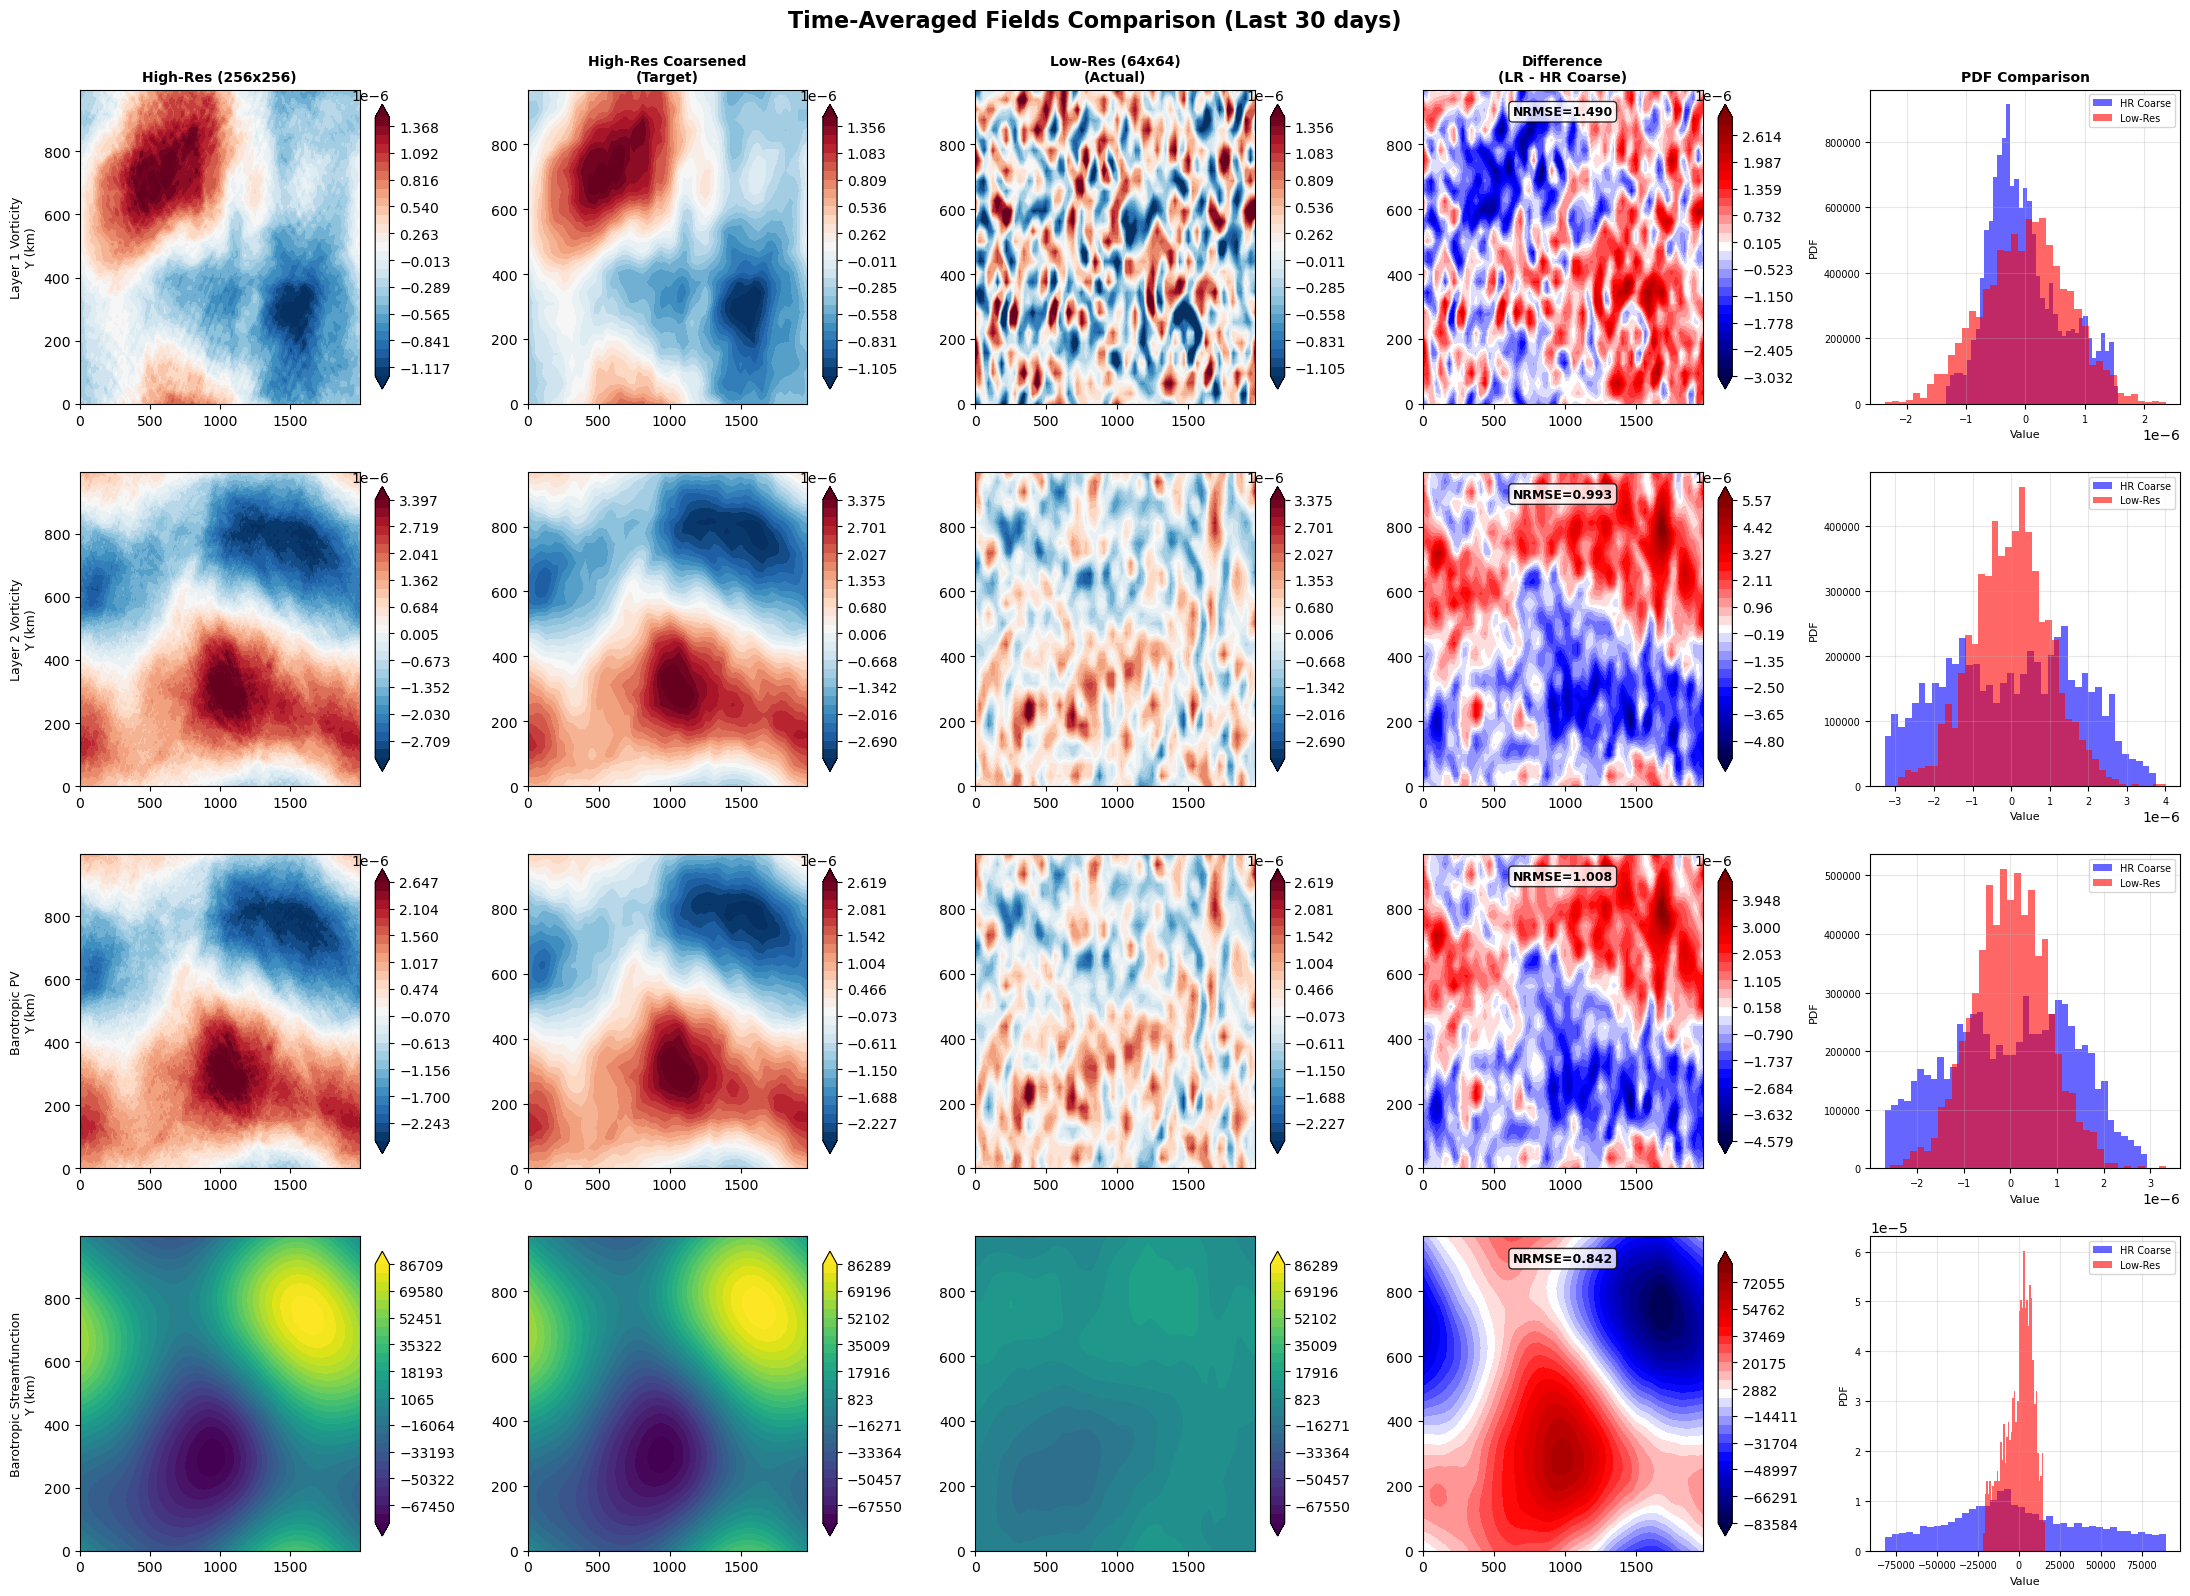


COMPLETE!
Generated files:
  - comparison_statistics.png
  - field_comparison.png
  - time_averaged_comparison.png
  - comparison_metrics.pkl


In [5]:
"""
Main Script for High-Res vs Low-Res QG Comparison
Run both simulations and compare results
"""

import numpy as np
import pickle
import os
from qg_model import QGTwoLayerModel
from qg_comparison import (compute_spectral_stats, compute_spatial_stats, 
                            compute_eddy_fluxes, plot_comparison, 
                            print_comparison_summary, compute_field_differences, 
                            plot_field_comparison)
from qg_advanced_analysis import compare_time_averaged_fields, plot_time_averaged_comparison

# ============================================================================
# CONFIGURATION: HIGH RESOLUTION (Ground Truth)
# ============================================================================

config_highres = {
    'name': 'HighRes_512x256',
    'nx': 512,
    'ny': 256,
    'Lx': 2.0e6,                  # 2000 km domain
    'Ly': 1.0e6,                  # 1000 km
    
    'beta': 1.8e-11,              # Moderate beta
    'f0': 1e-4,
    'g_prime': 0.02,              # Standard stratification
    'H1': 750.0,                  # Intermediate layer depth
    'H2': 3250.0,
    
    'r_drag': 8e-8,               # Moderate drag
    'nu': 3e14,                   # Moderate viscosity
    
    'dt': 600.0,                  # 10 min
}

# ============================================================================
# CONFIGURATION: LOW RESOLUTION (With Subgrid Parameters to Tune)
# ============================================================================

config_lowres = {
    'name': 'LowRes_64x32',
    'nx': 64,
    'ny': 32,
    'Lx': 2.0e6,                  # SAME as high-res
    'Ly': 1.0e6,                  # SAME as high-res
    
    'beta': 1.8e-11,              # SAME
    'f0': 1e-4,
    'g_prime': 0.02,              # SAME
    'H1': 750.0,                  # SAME
    'H2': 3250.0,
    
    'r_drag': 8e-8,               # SAME - will be insufficient at low-res
    'nu': 3e14,                   # SAME - will be insufficient at low-res
    

    'dt': 1800.0,                 # 30 min

    # 'subgrid_params': {
    #     'viscosity_scale': .5,
    #     'drag_scale': .5,
    #     'eddy_diffusivity': .005,
    #     'smagorinsky_coeff': .015,
    #     'energy_correction': -0.002,
    #     'enstrophy_correction': 3e-9,
#    }
    
#    new default
    'subgrid_params': {
        'viscosity_scale': 2.845714e+00,
        'drag_scale': 1.756769e+00,
        'eddy_diffusivity': 2.790588e+03,
        'smagorinsky_coeff': 2.157385e-01,
        'energy_correction': -2.449260e-03,
        'enstrophy_correction': 1.862843e-07,
    }

# optimal parameters:
#   'viscosity_scale': 2.845714e+00,
#   'drag_scale': 1.756769e+00,
#   'eddy_diffusivity': 2.790588e+03,
#   'smagorinsky_coeff': 2.157385e-01,
#   'energy_correction': -2.449260e-03,
#   'enstrophy_correction': 1.862843e-07,
    
    #defualt 
    # 'subgrid_params': {
    #     'viscosity_scale': 1.0,
    #     'drag_scale': 1.0,
    #     'eddy_diffusivity': 0.0,
    #     'smagorinsky_coeff': 0.0,
    #     'energy_correction': 0.0,
    #     'enstrophy_correction': 0.0,
    # }
}

# ============================================================================
# INITIAL CONDITIONS
# ============================================================================

def create_initial_conditions(nx, ny, Lx, Ly):
    """Create initial vortices with multi-scale structure"""
    x = np.arange(nx) * (Lx / nx)
    y = np.arange(ny) * (Ly / ny)
    X, Y = np.meshgrid(x, y)
    
    # Moderate number of vortices with moderate amplitudes
    vortex_params = [
        # Large-scale vortices
        {'x': 0.2*Lx, 'y': 0.3*Ly, 'sigma': 0.13*Lx, 'amp1': 4e-6, 'amp2': 2.5e-6},
        {'x': 0.8*Lx, 'y': 0.7*Ly, 'sigma': 0.13*Lx, 'amp1': -4e-6, 'amp2': -2.5e-6},
        {'x': 0.2*Lx, 'y': 0.7*Ly, 'sigma': 0.12*Lx, 'amp1': 3.5e-6, 'amp2': -2e-6},
        {'x': 0.8*Lx, 'y': 0.3*Ly, 'sigma': 0.12*Lx, 'amp1': -3.5e-6, 'amp2': 2e-6},
        
        # Medium-scale vortices
        {'x': 0.35*Lx, 'y': 0.5*Ly, 'sigma': 0.09*Lx, 'amp1': 3e-6, 'amp2': 1.5e-6},
        {'x': 0.65*Lx, 'y': 0.5*Ly, 'sigma': 0.09*Lx, 'amp1': -3e-6, 'amp2': -1.5e-6},
        {'x': 0.5*Lx, 'y': 0.25*Ly, 'sigma': 0.08*Lx, 'amp1': 2.5e-6, 'amp2': 0.0},
        {'x': 0.5*Lx, 'y': 0.75*Ly, 'sigma': 0.08*Lx, 'amp1': -2.5e-6, 'amp2': 0.0},
        
        # Small-scale vortices (poorly resolved at low-res)
        {'x': 0.4*Lx, 'y': 0.35*Ly, 'sigma': 0.06*Lx, 'amp1': 2e-6, 'amp2': 1e-6},
        {'x': 0.6*Lx, 'y': 0.65*Ly, 'sigma': 0.06*Lx, 'amp1': -2e-6, 'amp2': -1e-6},
        {'x': 0.3*Lx, 'y': 0.6*Ly, 'sigma': 0.05*Lx, 'amp1': 1.5e-6, 'amp2': 0.8e-6},
        {'x': 0.7*Lx, 'y': 0.4*Ly, 'sigma': 0.05*Lx, 'amp1': -1.5e-6, 'amp2': -0.8e-6},
    ]
    
    q1 = np.zeros((ny, nx))
    q2 = np.zeros((ny, nx))
    
    for vortex in vortex_params:
        x0, y0 = vortex['x'], vortex['y']
        sigma = vortex['sigma']
        amp1, amp2 = vortex['amp1'], vortex['amp2']
        
        r2 = (X - x0)**2 + (Y - y0)**2
        gauss = np.exp(-r2 / (2 * sigma**2))
        
        q1 += amp1 * gauss
        q2 += amp2 * gauss
    
    # Add modest multi-scale noise
    np.random.seed(42)
    
    # Only 2 scales of noise for stability
    for i in range(2):
        scale = 2**i
        if nx // scale >= 8:
            noise_q1 = np.random.randn(ny // scale, nx // scale)
            noise_q2 = np.random.randn(ny // scale, nx // scale)
            
            if scale > 1:
                from scipy.ndimage import zoom
                noise_q1 = zoom(noise_q1, scale, order=1)
                noise_q2 = zoom(noise_q2, scale, order=1)
            
            amplitude = 8e-7 / (scale + 1)  # Reduced amplitude
            q1 += amplitude * noise_q1
            q2 += amplitude * noise_q2
    
    return q1, q2

# ============================================================================
# RUN SIMULATION
# ============================================================================

def run_simulation(config, sim_days=180, save_interval_hours=12):
    """Run simulation and collect statistics"""
    
    print("\n" + "="*70)
    print(f"Running {config['name']} Simulation")
    print("="*70)
    print(f"Grid: {config['nx']} x {config['ny']}")
    print(f"Resolution: {config['Lx']/config['nx']/1e3:.1f} km per grid point")
    
    if 'subgrid_params' in config:
        print("\nSubgrid Parameters:")
        for key, val in config['subgrid_params'].items():
            print(f"  {key}: {val}")
    
    model = QGTwoLayerModel(config)
    q1, q2 = create_initial_conditions(config['nx'], config['ny'], 
                                       config['Lx'], config['Ly'])
    
    steps_per_day = int(86400 / config['dt'])
    total_steps = sim_days * steps_per_day
    save_every = int(save_interval_hours * 3600 / config['dt'])
    
    q1_history = [q1.copy()]
    q2_history = [q2.copy()]
    times = [0.0]
    
    energy_history = {'total': [], 'layer1': [], 'layer2': []}
    enstrophy_history = {'layer1': [], 'layer2': []}
    spatial_stats_history = []
    spectral_stats_history = []
    eddy_flux_history = []
    
    KE1, KE2, KE = model.compute_energy(q1, q2)
    ens1, ens2 = model.compute_enstrophy(q1, q2)
    
    energy_history['total'].append(KE)
    energy_history['layer1'].append(KE1)
    energy_history['layer2'].append(KE2)
    enstrophy_history['layer1'].append(ens1)
    enstrophy_history['layer2'].append(ens2)
    
    spatial_stats = compute_spatial_stats(model, q1, q2)
    spatial_stats_history.append(spatial_stats)
    
    k, KE_spec, Z_spec = compute_spectral_stats(model, q1, q2)
    spectral_stats_history.append({'k': k, 'KE': KE_spec, 'Z': Z_spec})
    
    fluxes = compute_eddy_fluxes(model, q1, q2)
    eddy_flux_history.append(fluxes)
    
    print(f"\nInitial Energy: {KE:.3e}")
    print(f"Initial Enstrophy: {ens1+ens2:.3e}")
    print("\nIntegrating...")
    
    dq1_hist = []
    dq2_hist = []
    
    for step in range(1, total_steps + 1):
        q1, q2 = model.step_ab3(q1, q2, dq1_hist, dq2_hist)
        
        if not (np.isfinite(q1).all() and np.isfinite(q2).all()):
            print(f"\n*** Unstable at step {step} ***")
            break
        
        if step % save_every == 0:
            t = step * config['dt'] / 86400
            times.append(t)
            q1_history.append(q1.copy())
            q2_history.append(q2.copy())
            
            KE1, KE2, KE = model.compute_energy(q1, q2)
            ens1, ens2 = model.compute_enstrophy(q1, q2)
            
            energy_history['total'].append(KE)
            energy_history['layer1'].append(KE1)
            energy_history['layer2'].append(KE2)
            enstrophy_history['layer1'].append(ens1)
            enstrophy_history['layer2'].append(ens2)
            
            spatial_stats = compute_spatial_stats(model, q1, q2)
            spatial_stats_history.append(spatial_stats)
            
            k, KE_spec, Z_spec = compute_spectral_stats(model, q1, q2)
            spectral_stats_history.append({'k': k, 'KE': KE_spec, 'Z': Z_spec})
            
            fluxes = compute_eddy_fluxes(model, q1, q2)
            eddy_flux_history.append(fluxes)
            
            if step % (save_every * 4) == 0:
                print(f"  Day {t:5.1f} | Energy: {KE:.3e} | Enstrophy: {ens1+ens2:.3e}")
    
    print("\n" + "="*70)
    print(f"{config['name']} Simulation Complete!")
    print("="*70)
    
    results = {
        'config': config,
        'model': model,
        'times': np.array(times),
        'q1_history': q1_history,
        'q2_history': q2_history,
        'energy_history': energy_history,
        'enstrophy_history': enstrophy_history,
        'spatial_stats_history': spatial_stats_history,
        'spectral_stats_history': spectral_stats_history,
        'eddy_flux_history': eddy_flux_history,
    }
    
    return results

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Run both simulations and compare"""
    
    print("\n" + "="*70)
    print("QG TWO-LAYER MODEL: HIGH-RES vs LOW-RES COMPARISON")
    print("="*70)
    
    # Check for existing high-res results
    if os.path.exists('highres_results.pkl'):
        print("\n" + "="*70)
        print("LOADING EXISTING HIGH-RES RESULTS")
        print("="*70)
        try:
            with open('highres_results.pkl', 'rb') as f:
                highres_results = pickle.load(f)
            print("✓ High-res results loaded successfully")
            print(f"  Grid: {highres_results['config']['nx']} x {highres_results['config']['ny']}")
            print(f"  Time range: 0 to {highres_results['times'][-1]:.1f} days")
            print(f"  Snapshots: {len(highres_results['times'])}")
        except Exception as e:
            print(f"✗ Error loading: {e}")
            print("  Running new simulation...")
            highres_results = run_simulation(config_highres, save_interval_hours=12)
            with open('highres_results.pkl', 'wb') as f:
                pickle.dump(highres_results, f)
            print("\n✓ High-res results saved")
    else:
        print("\n✗ No high-res results found. Running simulation...")
        highres_results = run_simulation(config_highres,  save_interval_hours=12)
        with open('highres_results.pkl', 'wb') as f:
            pickle.dump(highres_results, f)
        print("\n✓ High-res results saved")
    
    # Check for existing low-res results
    if os.path.exists('lowres_results.pkl'):
        print("\n" + "="*70)
        print("LOADING EXISTING LOW-RES RESULTS")
        print("="*70)
        try:
            with open('lowres_results.pkl', 'rb') as f:
                lowres_results = pickle.load(f)
            print("✓ Low-res results loaded successfully")
            print(f"  Grid: {lowres_results['config']['nx']} x {lowres_results['config']['ny']}")
            print(f"  Time range: 0 to {lowres_results['times'][-1]:.1f} days")
            print(f"  Snapshots: {len(lowres_results['times'])}")
            
            # Check subgrid params
            if 'subgrid_params' in lowres_results['config']:
                loaded = lowres_results['config']['subgrid_params']
                current = config_lowres['subgrid_params']
                
                match = all(loaded.get(k) == v for k, v in current.items())
                
                if not match:
                    print("\n⚠️  Subgrid parameters differ!")
                    print("  Loaded:")
                    for k, v in loaded.items():
                        marker = " ←DIFF" if loaded[k] != current.get(k) else ""
                        print(f"    {k}: {v}{marker}")
                    
                    resp = input("\n  Re-run with current params? (y/n): ")
                    if resp.lower() == 'y':
                        lowres_results = run_simulation(config_lowres, sim_days=180, save_interval_hours=12)
                        with open('lowres_results.pkl', 'wb') as f:
                            pickle.dump(lowres_results, f)
                        print("\n✓ Low-res results saved")
                else:
                    print("  ✓ Subgrid parameters match")
        except Exception as e:
            print(f"✗ Error loading: {e}")
            print("  Running new simulation...")
            lowres_results = run_simulation(config_lowres,  save_interval_hours=12)
            with open('lowres_results.pkl', 'wb') as f:
                pickle.dump(lowres_results, f)
            print("\n✓ Low-res results saved")
    else:
        print("\n✗ No low-res results found. Running simulation...")
        lowres_results = run_simulation(config_lowres, save_interval_hours=12)
        with open('lowres_results.pkl', 'wb') as f:
            pickle.dump(lowres_results, f)
        print("\n✓ Low-res results saved")
    
    # Generate comparisons
    print("\n" + "="*70)
    print("GENERATING COMPARISON PLOTS")
    print("="*70)
    
    metrics = plot_comparison(highres_results, lowres_results, 'comparison_statistics.png')
    
    field_stats = compute_field_differences(highres_results, lowres_results)
    metrics['q1_nrmse'] = field_stats['q1_nrmse']
    metrics['q2_nrmse'] = field_stats['q2_nrmse']
    metrics['psi1_nrmse'] = field_stats['psi1_nrmse']
    metrics['psi2_nrmse'] = field_stats['psi2_nrmse']
    
    #plot_field_comparison(highres_results, lowres_results, field_stats, 'field_comparison.png')
    
    print_comparison_summary(highres_results, lowres_results, metrics)
    
    # Time-averaged comparison (last 30 days)
    print("\n" + "="*70)
    print("TIME-AVERAGED COMPARISON (Last 30 days)")
    print("="*70)
    comparison = compare_time_averaged_fields(highres_results, lowres_results, n_days=30)
    plot_time_averaged_comparison(comparison, highres_results, lowres_results,
                                  output_file='time_averaged_comparison.png')
    
    with open('comparison_metrics.pkl', 'wb') as f:
        pickle.dump(metrics, f)
    
    print("\n" + "="*70)
    print("COMPLETE!")
    print("="*70)
    print("Generated files:")
    print("  - comparison_statistics.png")
    print("  - field_comparison.png")
    print("  - time_averaged_comparison.png")
    print("  - comparison_metrics.pkl")
    print("="*70)
    
    return highres_results, lowres_results, metrics

if __name__ == "__main__":
    results = main()

In [ ]:
##### 